<a href="https://colab.research.google.com/github/isdeniz/pred-to-be-checked/blob/main/max-seq-300-3-labels-pred-to-be-checked-p-s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers==4.40.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.0
    Uninstalling transformers-4.41.0:
      Successfully uninstalled transformers-4.41.0


In [2]:
pip install simpletransformers==0.64.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.1

In [3]:
import transformers
>>> transformers.__version__

'4.40.2'

In [4]:
import pandas as pd
from functools import partial
import sklearn
import torch
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import datetime
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.multiprocessing
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
torch.multiprocessing.set_start_method('spawn', force = True)
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
torch.multiprocessing.set_sharing_strategy('file_system')
cuda_available = torch.cuda.is_available()
print("Is cuda available?", cuda_available)

Is cuda available? True


In [5]:
train = pd.read_csv('data/train_df_p_s.csv')
test = pd.read_csv('data/test_df_p_s.csv')
print('Number of issues: ', train.shape, test.shape)

Number of issues:  (171392, 2) (19044, 2)


In [6]:
train.head()

,text,labels
0,2021-01-13T19:22:34Z NONE OpenAPITools/openapi-generator req update spring dependencies evaluation options B feature request related problem please describe problem spring dependencies using old libraries libraries relevant anymore superseeded better alternatives springfox example could replaced springdoc also generates maven projects also option generate sourcecode wihtout project files would breaking change generator also integration plugins static analyzing per pipeline run generated projects describe solution like want update templates spring build gradle maven sources date libraries describe alternatives considered one could set dependencies parent object leave generated project comes trouble defining old libs sourcecode additional context would completely implement also open suggestions give hint project would welcome update,1
1,2017-09-06T21:07:34Z NONE SeleniumHQ/selenium somehow provide way stop selenium standalone server programmatically B meta os selenium version 3 5 3 browser expected behavior previously way shut selenium server using http localhost 64146 selenium server driver cmd shutdownseleniumserver actual behavior documented way shut selenium standalone server steps reproduce start selenium server note way stop server api request,3
2,2018-11-11T20:39:28Z CONTRIBUTOR bazelbuild/bazel bazel crashes windows compiler msys gcc B exception stack trace caused java lang illegalstateexception bazel windows unix root jvm flag set use host jvm args flag example host jvm args dbazel windows unix root c tools msys64 com google devtools build lib util dependencyset windowspath getunixroot dependencyset java 285 com google devtools build lib util dependencyset windowspath translatewindowspath dependencyset java 269 com google devtools build lib util dependencyset windowspath access 000 dependencyset java 254 com google devtools build lib util dependencyset translatepath dependencyset java 112 com google devtools build lib util dependencyset adddependency dependencyset java 103 com google devtools build lib util dependencyset process dependencyset java 154 com google devtools build lib util dependencyset read dependencyset java 121 com google devtools build lib rules cpp cppcompileaction processdepset cppcompileaction java 1277 com google devtools build lib rules cpp cppcompileaction discoverinputsfromdotdfiles cppcompileaction java 1249 com google devtools build lib rules cpp cppcompileaction execute cppcompileaction java 1188 com google devtools build lib skyframe skyframeactionexecutor executeactiontask skyframeactionexecutor java 941 com google devtools build lib skyframe skyframeactionexecutor preparescheduleexecuteandcompleteaction skyframeactionexecutor java 872 com google devtools build lib skyframe skyframeactionexecutor access 900 skyframeactionexecutor java 114 com google devtools build lib skyframe skyframeactionexecutor actionrunner call skyframeactionexecutor java 731 com google devtools build lib skyframe skyframeactionexecutor actionrunner call skyframeactionexecutor java 685 java util concurrent futuretask run futuretask java 266 com google devtools build lib skyframe skyframeactionexecutor executeaction skyframeactionexecutor java 426 com google devtools build lib skyframe actionexecutionfunction checkcacheandexecuteifneeded actionexecutionfunction java 490 com google devtools build lib skyframe actionexecutionfunction compute actionexecutionfunction java 208 com google devtools build skyframe abstractparallelevaluator evaluate run abstractparallelevaluator java 363 4,0
3,2013-06-24T10:17:01Z COLLABORATOR spring-projects/spring-framework contentnegotiatingviewresolver select views content types requested spr 10683 B jeff knecht https jira spring io secure viewprofile jspa name jknecht opened spr 10683 https jira spring io browse spr 10683 redirect false commented browser internet explorer 8 app server tomcat 6 0 36 jvm version 1 7 spring web mvc project fails following viewresolver error user

In [7]:
test.head()

,text,labels
0,2015-06-04T15:59:27Z CONTRIBUTOR zaproxy/zaproxy cookie without secure flag alerts showing spider B alerts passive scanner cookie without secure flag shown pages visited spider happens site accessed spider http accessed https alerts shown original issue reported code google com thc202 2012 01 09 15 38 37,0
1,2022-07-06T18:33:27Z NONE elastic/elasticsearch custom rescorer returns topdocs zero scoredocs causes arrayindexoutofboundsexception within rescorephase B custom rescorer filters documents certain threshold documents within rescorer score threshold empty topdocs returned empty topdocs returned rescorephase throws arrayindexoutofboundsexception code directly references topdocs scoredocs 0 score without checking size topdocs empty topdocs new topdocs new new totalhits 0 totalhits relation equal new scoredocs 0 bug appears first introduced v7 0 0 alpha1 confirmed appear master day commit responsible found upgrade lucene 8 snapshot https github com elastic elasticsearch commit 7ad71f906a9608e1c168358624f4b0a39b240296 commit pr issue linked commit see method signature function topdocs changed inadvertently requires topdocs empty stage fix bug could check size topdocs returned running rescorers,1
2,2021-09-22T13:22:58Z NONE TeamNewPipe/NewPipe suggest new videos watch B fill template properly issue liable closed feel tired lazy right open issue time wait comments brackets show submitted issue see preview checklist checklist compulsory first box checked show done x checked find duplicates open closed issue repo seriously check x read contribution guidelines given https github com teamnewpipe newpipe blob head github contributing md x issue contains one feature request open one issue every feature want request describe feature want like see new screen added suggests videos watch like able select favorite channels want presented older videos videos watched time basically random way watching old videos way suggestions without need data collection either random videos suggestions old videos channels watched based watch history select favorite channels get presented old videos seen optionally also describe alternatives considered example z also good alternative good least considered z turn good idea feature request related problem please describe clear concise description problem maybe developers community could brainstorm come better solution problem exist link related issues prs developers keep track easier example want x way additional context add context like screenshots feature request example photo cat everyone benefit feature feature make newpipe interesting use finished watching chronological feed sometimes want continue watching videos apps would achieved taking watch history suggestions new content based newpipe obviously suggested way would enable us get suggestions keep watching,1
3,2018-08-18T10:30:03Z NONE facebook/react-native inflating android native ui react native screen B full react native screen app screen consists flatlist react native component flatlist want add header header view native added package react activity like addpackage new function multimediaviewpackage package com o1 shop reactmodules resellerfeed public class multimediaviewpackage implements reactpackage override public list nativemodule function return function override public list viewmanager function return collections viewmanager singletonlist new function multimediaviewmanager public class multimediaviewmanager extends simpleviewmanager multimediaholder private static final string multimedia view multimediaview return name view manager name used reference view manager javascript createreactnativecomponentclass override public string function return multimedia view subclasses return new view instance proper type param reactcontext override protected multimediaholder function multimediaholder new function setlayoutparams new function log e height createviewinstance height function width return get height printed 500 method getting

In [8]:
label_encoding = {'bug': 0, 'enhancement': 1, 'out-of-scope': 2, 'to-be-checked': 3}

In [9]:
train_wo_t = train.copy(deep = True)
train_wo_t = train_wo_t[train_wo_t['labels'] != 3]
train_wo_t = train_wo_t.reset_index(drop = True)
train_wo_t.shape[0]

149535

In [10]:
train_wo_t['labels'].value_counts()

labels
2    67527
0    49864
1    32144
Name: count, dtype: int64

In [11]:
train_label_perc = train_wo_t['labels'].value_counts(normalize = True) * 100
train_label_perc

labels
2    45.157990
0    33.346039
1    21.495971
Name: proportion, dtype: float64

In [12]:
test_wo_t = test.copy(deep = True)
test_wo_t = test_wo_t[test_wo_t['labels'] != 3]
test_wo_t = test_wo_t.reset_index(drop = True)
test_wo_t.shape[0]

16615

In [13]:
test_wo_t['labels'].value_counts()

labels
2    7503
0    5540
1    3572
Name: count, dtype: int64

In [14]:
test_label_perc = test_wo_t['labels'].value_counts(normalize = True) * 100
test_label_perc

labels
2    45.157990
0    33.343364
1    21.498646
Name: proportion, dtype: float64

In [15]:
lr = 3e-5
drp = 0
epochs = 4
batch_t = 100
batch_e = 100
# max_seq = 200
max_seq = 300
name = 'roberta'
ver = 'roberta-base'
output_name = 'outputs/' + name

def create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq):
    model_args = ClassificationArgs()
    model_name = name
    model_version = ver
    model_args.learning_rate = lr
    model_args.num_train_epochs = epochs
    model_args.eval_batch_size = batch_t
    model_args.train_batch_size = batch_e
    model_args.max_seq_length = max_seq
    # model_args.n_gpu = 2
    model_args.n_gpu = 1
    model_args.output_dir = output_name +'/'
    model_args.overwrite_output_dir = True
    model_args.reprocess_input_data = True
    model_args.preprocess_inputs = True
    model_args.save_steps = -1
    model_args.save_model_every_epoch = False

    model = ClassificationModel(model_name, model_version, args = model_args,
                                num_labels = 3,
                                use_cuda = cuda_available)

    return model

In [16]:
def calc(p1, p2, func, **kwargs):
    return func(p1, p2, **kwargs)

metrics_recom = {
    "accuracy": partial(calc,func=sklearn.metrics.accuracy_score) ,
    "p_micro": partial(calc,func=sklearn.metrics.precision_score,average='micro'),
    "p_macro": partial(calc,func=sklearn.metrics.precision_score,average='macro'),
    "p_w": partial(calc,func=sklearn.metrics.precision_score,average='weighted'),
    "r_micro": partial(calc,func=sklearn.metrics.recall_score,average='micro'),
    "r_macro": partial(calc,func=sklearn.metrics.recall_score,average='macro'),
    "r_w": partial(calc,func=sklearn.metrics.recall_score,average='weighted'),
    "f_micro": partial(calc,func=sklearn.metrics.f1_score,average='micro'),
    "f_macro": partial(calc,func=sklearn.metrics.f1_score,average='macro'),
    "f_w": partial(calc,func=sklearn.metrics.f1_score,average='weighted'),
    "classificationReport": partial(calc,func=sklearn.metrics.classification_report, output_dict = True)
}

In [17]:
model = create_model(name, ver, lr, drp, epochs, batch_t, batch_e, max_seq)
start = datetime.datetime.now()
print('-'*5,  name, ', start time:',
datetime.datetime.strftime(datetime.datetime.today(), '%d/%m/%Y-%H:%M'), '-'*5)
model.train_model(train_df = train_wo_t, **metrics_recom)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

----- roberta , start time: 27/05/2024-19:57 -----


  0%|          | 0/149535 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1496 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1496 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1496 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1496 [00:00<?, ?it/s]

(5984, 0.395952999422496)

In [18]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results, model_outputs, wrong_pred = model.eval_model(test_wo_t, verbose=True, **metrics_recom)
results

----- roberta , duration is: 0h:31m:23s ----- 




  0%|          | 0/16615 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/167 [00:00<?, ?it/s]

{'mcc': 0.7793629672418966,
 'accuracy': 0.858982846825158,
 'p_micro': 0.858982846825158,
 'p_macro': 0.8502648797524154,
 'p_w': 0.8590938418937583,
 'r_micro': 0.858982846825158,
 'r_macro': 0.8507263123752645,
 'r_w': 0.858982846825158,
 'f_micro': 0.858982846825158,
 'f_macro': 0.8504730216228152,
 'f_w': 0.8590139718638642,
 'classificationReport': {'0.0': {'precision': 0.8516542155816436,
   'recall': 0.8642599277978339,
   'f1-score': 0.8579107686794483,
   'support': 5540},
  '1.0': {'precision': 0.8122540753232153,
   'recall': 0.8090705487122061,
   'f1-score': 0.8106591865357643,
   'support': 3572},
  '2.0': {'precision': 0.8868863483523873,
   'recall': 0.8788484606157537,
   'f1-score': 0.8828491096532334,
   'support': 7503},
  'accuracy': 0.858982846825158,
  'macro avg': {'precision': 0.8502648797524154,
   'recall': 0.8507263123752645,
   'f1-score': 0.8504730216228152,
   'support': 16615},
  'weighted avg': {'precision': 0.8590938418937583,
   'recall': 0.858982846

In [19]:
model_outputs.shape[0]

16615

In [20]:
model_outputs_df = pd.DataFrame(model_outputs, columns = ['bug', 'enhancement', 'out-of-scope'])
model_outputs_df.head()

,bug,enhancement,out-of-scope
0,3.224609,-0.101135,-3.185547
1,4.300781,-2.265625,-1.942383
2,-3.335938,2.269531,0.910156
3,-1.064453,-3.193359,4.449219
4,-3.501953,0.588379,2.503906


In [21]:
def get_prediction(row):
  max_value = row.max()
  if max_value == row['bug']:
    return 0
  elif max_value == row['enhancement']:
    return 1
  elif max_value == row['out-of-scope']:
    return 2
  elif max_value == row['to-be-checked']:
    return 3

In [22]:
model_outputs_df['prediction'] = model_outputs_df.apply(get_prediction, axis = 1)
model_outputs_df.head()

,bug,enhancement,out-of-scope,prediction
0,3.224609,-0.101135,-3.185547,0
1,4.300781,-2.265625,-1.942383,0
2,-3.335938,2.269531,0.910156,1
3,-1.064453,-3.193359,4.449219,2
4,-3.501953,0.588379,2.503906,2


In [23]:
test_wo_t.shape[0]

16615

In [24]:
model_outputs_df['actual'] = test_wo_t['labels']
model_outputs_df.head()

,bug,enhancement,out-of-scope,prediction,actual
0,3.224609,-0.101135,-3.185547,0,0
1,4.300781,-2.265625,-1.942383,0,1
2,-3.335938,2.269531,0.910156,1,1
3,-1.064453,-3.193359,4.449219,2,2
4,-3.501953,0.588379,2.503906,2,2


In [25]:
label_names = ['bug', 'enhancement', 'out-of-scope']

In [26]:
predicted_labels = model_outputs_df['prediction']
actual_labels = model_outputs_df['actual']

In [27]:
confusion_matrix = confusion_matrix(actual_labels, predicted_labels)
print(confusion_matrix)

[[4788  268  484]
 [ 325 2890  357]
 [ 509  400 6594]]


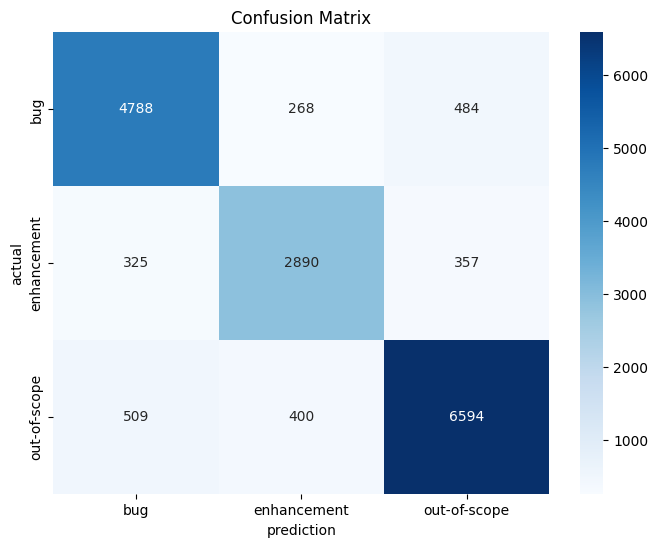

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
test_wo_t['labels'].value_counts()

labels
2    7503
0    5540
1    3572
Name: count, dtype: int64

Performance on training set

In [30]:
hours, remainder = divmod((datetime.datetime.now() - start).total_seconds(), 3600)
minutes, seconds = divmod(remainder, 60)
print('-'*5,  name, ', duration is:', '%dh:%dm:%ds' % (hours, minutes, seconds), '-'*5, '\n\n')
results_train, model_outputs_train, wrong_pred_train = model.eval_model(train_wo_t, verbose=True, **metrics_recom)
results_train

----- roberta , duration is: 0h:34m:31s ----- 




  0%|          | 0/149535 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1496 [00:00<?, ?it/s]

{'mcc': 0.8452225954711168,
 'accuracy': 0.9010800147122747,
 'p_micro': 0.9010800147122747,
 'p_macro': 0.8965970056474628,
 'p_w': 0.9012010732044685,
 'r_micro': 0.9010800147122747,
 'r_macro': 0.8960353601308441,
 'r_w': 0.9010800147122747,
 'f_micro': 0.9010800147122747,
 'f_macro': 0.8962485968649873,
 'f_w': 0.9010759582461981,
 'classificationReport': {'0.0': {'precision': 0.8889150019584802,
   'recall': 0.9102358414888496,
   'f1-score': 0.8994490904046609,
   'support': 49864},
  '1.0': {'precision': 0.8809741921218056,
   'recall': 0.8676269288203086,
   'f1-score': 0.8742496199119136,
   'support': 32144},
  '2.0': {'precision': 0.919901822862103,
   'recall': 0.9102433100833741,
   'f1-score': 0.9150470802783877,
   'support': 67527},
  'accuracy': 0.9010800147122747,
  'macro avg': {'precision': 0.8965970056474628,
   'recall': 0.8960353601308441,
   'f1-score': 0.8962485968649873,
   'support': 149535},
  'weighted avg': {'precision': 0.9012010732044685,
   'recall': 0.

In [31]:
model_outputs_train.shape[0]

149535

In [32]:
model_outputs_df_train = pd.DataFrame(model_outputs_train, columns = ['bug', 'enhancement', 'out-of-scope'])
model_outputs_df_train.head()

,bug,enhancement,out-of-scope
0,-2.667969,3.708984,-1.545898
1,3.806641,-0.549805,-3.156250
2,0.452393,0.123291,-0.941895
3,1.225586,-3.876953,2.511719
4,-2.277344,-2.681641,5.320312


In [33]:
model_outputs_df_train['prediction'] = model_outputs_df_train.apply(get_prediction, axis = 1)
model_outputs_df_train.head()

,bug,enhancement,out-of-scope,prediction
0,-2.667969,3.708984,-1.545898,1
1,3.806641,-0.549805,-3.156250,0
2,0.452393,0.123291,-0.941895,0
3,1.225586,-3.876953,2.511719,2
4,-2.277344,-2.681641,5.320312,2


In [34]:
train_wo_t.shape[0]

149535

In [35]:
model_outputs_df_train['actual'] = train_wo_t['labels']
model_outputs_df_train.head()

,bug,enhancement,out-of-scope,prediction,actual
0,-2.667969,3.708984,-1.545898,1,1
1,3.806641,-0.549805,-3.156250,0,0
2,0.452393,0.123291,-0.941895,0,0
3,1.225586,-3.876953,2.511719,2,2
4,-2.277344,-2.681641,5.320312,2,2


In [36]:
predicted_labels_train = model_outputs_df_train['prediction']
actual_labels_train = model_outputs_df_train['actual']

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix_train = confusion_matrix(actual_labels_train, predicted_labels_train)
print(confusion_matrix_train)

[[45388  1318  3158]
 [ 2061 27889  2194]
 [ 3611  2450 61466]]


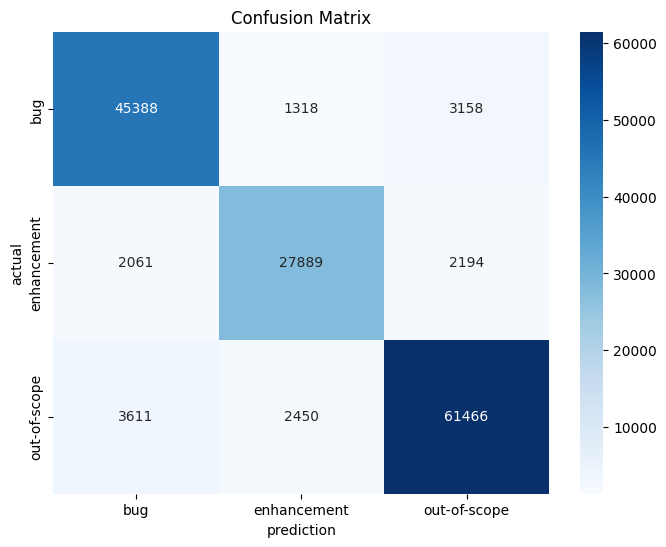

In [39]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix_train,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = label_names,
            yticklabels = label_names)
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
train_wo_t['labels'].value_counts()

labels
2    67527
0    49864
1    32144
Name: count, dtype: int64

Predicting to-be-checked issues

In [41]:
train_t = train.copy(deep = True)
train_t = train_t[train_t['labels'] == 3]
train_t = train_t.reset_index(drop = True)
train_t.shape[0]

21857

In [42]:
train_t['labels'].value_counts()

labels
3    21857
Name: count, dtype: int64

In [43]:
test_t = test.copy(deep = True)
test_t = test_t[test_t['labels'] == 3]
test_t = test_t.reset_index(drop = True)
test_t.shape[0]

2429

In [44]:
test_t['labels'].value_counts()

labels
3    2429
Name: count, dtype: int64

In [45]:
to_be_checked_issues = pd.concat([train_t, test_t], ignore_index = True)

In [46]:
to_be_checked_issues.shape[0]

24286

In [47]:
to_be_checked_issues.head()

,text,labels
0,2017-09-06T21:07:34Z NONE SeleniumHQ/selenium somehow provide way stop selenium standalone server programmatically B meta os selenium version 3 5 3 browser expected behavior previously way shut selenium server using http localhost 64146 selenium server driver cmd shutdownseleniumserver actual behavior documented way shut selenium standalone server steps reproduce start selenium server note way stop server api request,3
1,2018-08-14T11:08:15Z NONE neo4j/neo4j neo4j 3 4 4 threads available B hi upgrade function environment neo4j 3 4 4 net driver 1 6 1 two weeks ago something like twice three times day get lots error neo4j driver v1 transientexception available threads serve request moment retry later time consider increasing max thread pool size bolt function rollback neo4j version everything works perfectly hope help somehow give tools give information thanks niv,3
2,2019-06-13T17:37:52Z NONE bazelbuild/bazel crosscompile 0 26 0 arm returns matching toolchains found types bazel tools tools cpp toolchain type B attention please read follow question build test query deploy using bazel ask stackoverflow instead https stackoverflow com questions tagged bazel discussion starter send bazel discuss googlegroups com bug feature request fill form best description problem feature request trying crosscompile targets using bazel 0 26 1 arm everything works try run using k8 however switch cpu arm get following error warning ignoring java home must point jdk jre info invocation id 61c08ab3 983f 474e bb68 05e3a49158e9 info toolchainresolution selected execution platform bazel tools platforms host platform info toolchainresolution looking toolchain type bazel tools tools cpp toolchain type info toolchainresolution considering toolchain local config cc cc compiler armabi v7a info toolchainresolution toolchain constraint bazel tools platforms os value bazel tools platforms android match value bazel tools platforms linux target platform bazel tools platforms target platform info toolchainresolution rejected toolchain local config cc cc compiler armabi v7a target platform mismatch info toolchainresolution considering toolchain local config cc cc compiler k8 info toolchainresolution toolchain constraint bazel tools platforms cpu value bazel tools platforms x86 64 match value bazel tools platforms arm target platform bazel tools platforms target platform info toolchainresolution rejected toolchain local config cc cc compiler k8 target platform mismatch info toolchainresolution toolchains found error resolving toolchains target org lzma lzma lzma matching toolchains found types bazel tools tools cpp toolchain type error analysis target org lzma lzma lzma failed build aborted matching toolchains found types bazel tools tools cpp toolchain type bugs simplest easiest way reproduce bug please provide minimal example possible setting cpu arm causes issue manifest operating system running bazel ubuntu 16 04 output bazel info release warning ignoring java home must point jdk jre info invocation id de5b36b8 0198 4894 9c66 a72299d652f1 release 0 26 0,3
3,2019-11-20T13:16:28Z CONTRIBUTOR quarkusio/quarkus grpc support B description implementing support grpc https grpc io likely long running task epic cover minimum viable product implementation release something useful asap iterate going forwards early task needs decide included mvp maybe schedule follow epics future work analysis links analysis docs containing architecture design work requirements gathering etc tasks x checklist sub tasks goes represented links github issues,3
4,2009-09-18T12:33:50Z COLLABORATOR spring-projects/spring-framework field autowiring testcontext framework ignores explicit qualifier favor qualification field name spr 6128 B chris beams https jira spring io secure viewprofile jspa name cbeams opened spr 6128 https jira spring io browse spr 6128 redirect false commented repro autowiredqualifiertests context xml xml version 1 0 encoding utf 8 beans xmlns http www springfr

In [48]:
pred, raw_outputs = model.predict(to_be_checked_issues['text'].tolist())

  0%|          | 0/24286 [00:00<?, ?it/s]

  0%|          | 0/243 [00:00<?, ?it/s]

In [49]:
pred

array([1, 0, 0, ..., 1, 2, 1])

In [50]:
raw_outputs

array([[-0.8515625 ,  2.57226562, -2.2109375 ],
       [ 0.58642578, -1.53613281,  0.55957031],
       [ 2.62109375, -0.03007507, -2.77929688],
       ...,
       [ 0.42651367,  2.0234375 , -2.6953125 ],
       [-1.65820312, -1.44238281,  2.8515625 ],
       [-1.84082031,  1.42382812,  0.08746338]])

In [51]:
prediction_to_be_checked = pd.DataFrame(columns = ['text', 'prediction'])

In [52]:
prediction_to_be_checked['text'] = to_be_checked_issues['text']

In [53]:
pred_df = pd.DataFrame(pred, columns = ['prediction'])
pred_df.head()

,prediction
0,1
1,0
2,0
3,1
4,0


In [54]:
prediction_to_be_checked['prediction'] = pred_df['prediction']

In [55]:
prediction_to_be_checked.head()

,text,prediction
0,2017-09-06T21:07:34Z NONE SeleniumHQ/selenium somehow provide way stop selenium standalone server programmatically B meta os selenium version 3 5 3 browser expected behavior previously way shut selenium server using http localhost 64146 selenium server driver cmd shutdownseleniumserver actual behavior documented way shut selenium standalone server steps reproduce start selenium server note way stop server api request,1
1,2018-08-14T11:08:15Z NONE neo4j/neo4j neo4j 3 4 4 threads available B hi upgrade function environment neo4j 3 4 4 net driver 1 6 1 two weeks ago something like twice three times day get lots error neo4j driver v1 transientexception available threads serve request moment retry later time consider increasing max thread pool size bolt function rollback neo4j version everything works perfectly hope help somehow give tools give information thanks niv,0
2,2019-06-13T17:37:52Z NONE bazelbuild/bazel crosscompile 0 26 0 arm returns matching toolchains found types bazel tools tools cpp toolchain type B attention please read follow question build test query deploy using bazel ask stackoverflow instead https stackoverflow com questions tagged bazel discussion starter send bazel discuss googlegroups com bug feature request fill form best description problem feature request trying crosscompile targets using bazel 0 26 1 arm everything works try run using k8 however switch cpu arm get following error warning ignoring java home must point jdk jre info invocation id 61c08ab3 983f 474e bb68 05e3a49158e9 info toolchainresolution selected execution platform bazel tools platforms host platform info toolchainresolution looking toolchain type bazel tools tools cpp toolchain type info toolchainresolution considering toolchain local config cc cc compiler armabi v7a info toolchainresolution toolchain constraint bazel tools platforms os value bazel tools platforms android match value bazel tools platforms linux target platform bazel tools platforms target platform info toolchainresolution rejected toolchain local config cc cc compiler armabi v7a target platform mismatch info toolchainresolution considering toolchain local config cc cc compiler k8 info toolchainresolution toolchain constraint bazel tools platforms cpu value bazel tools platforms x86 64 match value bazel tools platforms arm target platform bazel tools platforms target platform info toolchainresolution rejected toolchain local config cc cc compiler k8 target platform mismatch info toolchainresolution toolchains found error resolving toolchains target org lzma lzma lzma matching toolchains found types bazel tools tools cpp toolchain type error analysis target org lzma lzma lzma failed build aborted matching toolchains found types bazel tools tools cpp toolchain type bugs simplest easiest way reproduce bug please provide minimal example possible setting cpu arm causes issue manifest operating system running bazel ubuntu 16 04 output bazel info release warning ignoring java home must point jdk jre info invocation id de5b36b8 0198 4894 9c66 a72299d652f1 release 0 26 0,0
3,2019-11-20T13:16:28Z CONTRIBUTOR quarkusio/quarkus grpc support B description implementing support grpc https grpc io likely long running task epic cover minimum viable product implementation release something useful asap iterate going forwards early task needs decide included mvp maybe schedule follow epics future work analysis links analysis docs containing architecture design work requirements gathering etc tasks x checklist sub tasks goes represented links github issues,1
4,2009-09-18T12:33:50Z COLLABORATOR spring-projects/spring-framework field autowiring testcontext framework ignores explicit qualifier favor qualification field name spr 6128 B chris beams https jira spring io secure viewprofile jspa name cbeams opened spr 6128 https jira spring io browse spr 6128 redirect false commented repro autowiredqualifiertests context xml xml version 1 0 encoding utf 8 beans xmlns http www spri

In [56]:
prediction_to_be_checked['prediction'].value_counts()

prediction
0    10270
2     7614
1     6402
Name: count, dtype: int64

In [57]:
prediction_to_be_checked.to_csv('data/prediction_to_be_checked_p_s.csv')